<a href="https://colab.research.google.com/github/Ali-shakib23/Student-Performance-Prediction-using-Linear-Regression/blob/main/Student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [1]:
import pandas as pd

In [13]:
data = pd.read_csv('student-mat.csv',sep=';')

In [14]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [21]:
features = ['G1', 'G2', 'studytime', 'failures', 'absences', 'goout', 'health']
target = 'G3'

X = data[features]
y = data[target]

# Check the shape of the features and target
X.shape, y.shape

((395, 7), (395,))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
print(X_train.shape)  # Output: (316, 7)
print(X_test.shape)   # Output: (79, 7)
print(y_train.shape)  # Output: (316,)
print(y_test.shape)   # Output: (79,)

(316, 7)
(79, 7)
(316,)
(79,)


In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

In [32]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print ("Mean Squared Error : ", mse )
print ("R- sequafed Error : ", r2 )


Mean Squared Error :  4.607527509257331
R- sequafed Error :  0.77529788402717


In [55]:

print (data[features],data[target])

     G1  G2  studytime  failures  absences  goout  health
0     5   6          2         0         6      4       3
1     5   5          2         0         4      3       3
2     7   8          2         3        10      2       3
3    15  14          3         0         2      2       5
4     6  10          2         0         4      2       5
..   ..  ..        ...       ...       ...    ...     ...
390   9   9          2         2        11      4       4
391  14  16          1         0         3      5       2
392  10   8          1         3         3      3       3
393  11  12          1         0         0      1       5
394   8   9          1         0         5      3       5

[395 rows x 7 columns] 0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64


In [57]:
new_input = pd.DataFrame({
    'G1': [8],         # First period grade
    'G2': [9],         # Second period grade
    'studytime': [1],   # Study time (0-4)
    'failures': [0],    # Number of past class failures
    'absences': [5],     # Number of absences
    'goout': [3],       # Going out with friends (1-5)
    'health': [5]       # Health status (1-5)
})

# Make a prediction
predicted_grade = model.predict(new_input)
print(f'Predicted Final Grade (G3): {predicted_grade[0]}')

Predicted Final Grade (G3): 8.555703354381563


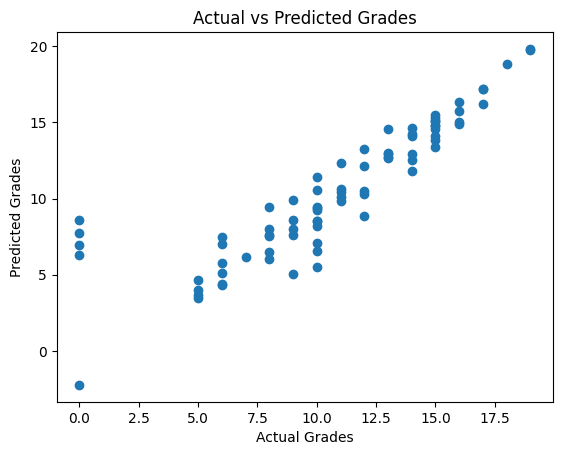

In [58]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs Predicted Grades')
plt.show()


In [38]:
max_g3 = data['G3'].max()
print(f"The maximum G3 score is: {max_g3}")

The maximum G3 score is: 20
